In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import script

In [2]:
df_tesla = pd.read_csv('data/tesla-daily.csv')
df_tesla.head()

,timestamp,open,high,low,close,volume
0,2022-03-18,874.49,907.85,867.3900,905.39,33443159
1,2022-03-17,830.99,875.00,825.7178,871.60,22194324
2,2022-03-16,809.00,842.00,802.2601,840.23,28009607
3,2022-03-15,775.27,805.57,756.5700,801.89,22280381
4,2022-03-14,780.61,800.70,756.0400,766.37,23717421


In [3]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  2952 non-null   object 
 1   open       2952 non-null   float64
 2   high       2952 non-null   float64
 3   low        2952 non-null   float64
 4   close      2952 non-null   float64
 5   volume     2952 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 138.5+ KB


In [4]:
df_tesla['ratio'] = 100*(df_tesla.close - df_tesla.open)/df_tesla.open

In [5]:
df_tesla['absolute'] = df_tesla.close - df_tesla.open

In [6]:
df_tesla.timestamp = pd.to_datetime(df_tesla.timestamp)

In [7]:
df_tesla.head()

,timestamp,open,high,low,close,volume,ratio,absolute
0,2022-03-18,874.49,907.85,867.3900,905.39,33443159,3.533488,30.90
1,2022-03-17,830.99,875.00,825.7178,871.60,22194324,4.886942,40.61
2,2022-03-16,809.00,842.00,802.2601,840.23,28009607,3.860321,31.23
3,2022-03-15,775.27,805.57,756.5700,801.89,22280381,3.433642,26.62
4,2022-03-14,780.61,800.70,756.0400,766.37,23717421,-1.824214,-14.24


<AxesSubplot:xlabel='timestamp'>

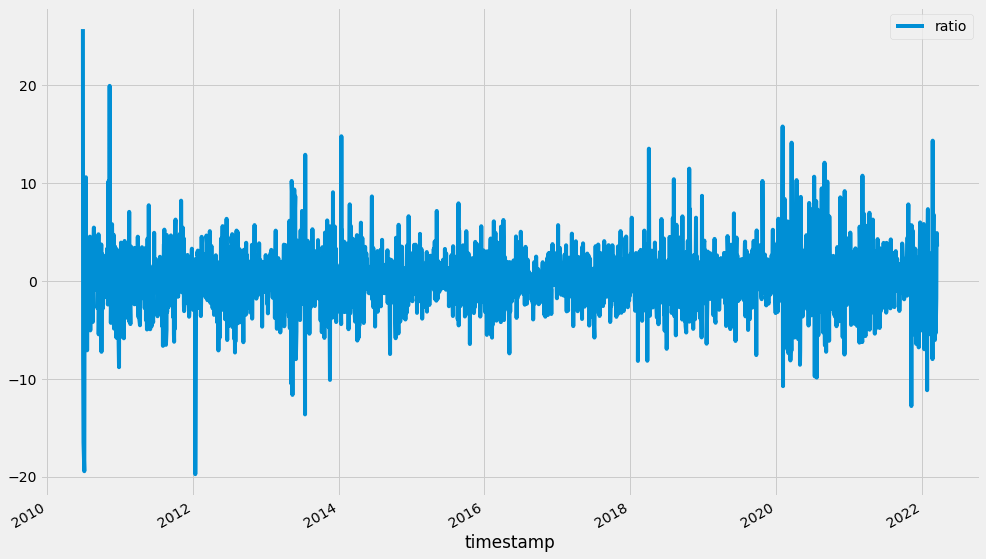

In [8]:
df_tesla.plot('timestamp', 'ratio')


In [9]:
import plotly.graph_objects as go
from datetime import datetime


In [10]:
# import plotly.io as pio
# pio.renderers.default = 'iframe_connected'

In [11]:

fig = go.Figure(data=[go.Candlestick(x=df_tesla.timestamp,
                open=df_tesla.open,
                high=df_tesla.high,
                low=df_tesla.low,
                close=df_tesla.close)])

#fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [12]:
def plot_candlestick(df):
    fig = go.Figure(data=[go.Candlestick(x=df.timestamp,
                open=df.open,
                high=df.high,
                low=df.low,
                close=df.close)])
    fig.show()

In [13]:
plot_candlestick(df_tesla)